# JEM207 midterm

### Midterm 5.4.2022

In [2]:
#packages that might come in handy
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time
import os
#from IPython.core.display import HTML, display
idx = pd.IndexSlice

### Part One

In [10]:
link = 'https://ies-midterm.soulution.rocks/'

endpoint = 'login'
my_number = {"cuni": "98698413"}
r = requests.post(f'{link}{endpoint}', json = my_number).json()
print(r)
print("my personal code:", r['data']['personal_code'])
dataset_ids = r['data']['dataset_ids']
dataset_ids

{'data': {'personal_code': '7bb6510e', 'dataset_ids': ['95ff551368', '40bb66faec', '86c214b421', 'f45ec2e9fc', '64a5d99db0', '24f88cb68c', 'e2beb850b2', '8c34bdfc03', '11f651d1ee']}, 'message': 'Hello, Křenková Pavlína! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}
my personal code: 7bb6510e


['95ff551368',
 '40bb66faec',
 '86c214b421',
 'f45ec2e9fc',
 '64a5d99db0',
 '24f88cb68c',
 'e2beb850b2',
 '8c34bdfc03',
 '11f651d1ee']

In [55]:
endpoint = 'data/'
data_list = []
for code in dataset_ids:
    req = requests.get(f'{link}{endpoint}{code}')
    while req.status_code != 200:
        req = requests.get(f'{link}{endpoint}{code}')
    data_list.append(req.json())
#data_list[0] #to see the structure

In [18]:
print(data_list[0]['message'])
company_names = []
for one_comp in data_list:
    company_names.append(one_comp['data']['company'])
company_names #We have 9 companies

Columns are in order Date,Open,High,Low,Close,Adj.Close,Volume. Make sure your data are ordered.


['AHT', 'GSK', 'TSCO', 'AAL', 'LAND', 'PSN', 'IAG', 'IHG', 'MNG']

### Part 2

In [39]:
#creating the dataframe
def Create_PD_series(json1):
    json2 = pd.read_json(json.dumps(json1['data']['data']))
    json2.columns =['Date','Open','High','Low','Close','Adj.Close','Volume'] #from message
    json2 = json2.set_index('Date')
    json2 = json2.stack()
    return json2
series_list = []
for x in data_list:
    series_list.append(Create_PD_series(x))
df = pd.concat(series_list, axis = 1)
df.columns = company_names
df

AHT           GSK          TSCO           AAL  \
Date                                                                           
2019-01-02 Adj.Close  3.726602e+01  3.432425e+01  8.010709e+01  3.196316e+01   
           Close      4.061265e+01  3.788000e+01  8.223000e+01  3.248000e+01   
           High       4.090909e+01  3.811000e+01  8.401000e+01  3.265000e+01   
           Low        3.863636e+01  3.760000e+01  8.086000e+01  3.105000e+01   
           Open       3.903162e+01  3.777000e+01  8.181000e+01  3.146000e+01   
...                            ...           ...           ...           ...   
2020-11-20 Close      4.000000e+00  3.703000e+01  1.297000e+02  1.253000e+01   
           High       4.690000e+00  3.720000e+01  1.314000e+02  1.291000e+01   
           Low        3.910000e+00  3.688000e+01  1.284200e+02  1.246000e+01   
           Open       4.460000e+00  3.714000e+01  1.300500e+02  1.280000e+01   
           Volume     2.201800e+06  4.273900e+06  1.324500e+06  5.849110e+07   

                               LAND            PSN         IAG            IHG  \
Date                                                                            
2019-01-02 Adj.Close      10.799848            NaN        3.69      51.824001   
           Close          11.700000            NaN        3.69      56.438354   
           High           11.750000            NaN        3.76      56.902000   
           Low            11.190000            NaN        3.60      55.732349   
           Open           11.450000            NaN        3.68      56.817703   
...                             ...            ...         ...            ...   
2020-11-20 Close          15.030000      31.750000        3.41      59.669998   
           High           15.100000      32.147999        3.51      60.130001   
           Low            14.850000      31.575001        3.40      59.549999   
           Open           14.960000      32.070000        3.42      59.930000   
           Volume     195800.000000  347700.000000  6329600.00  100500.000000   

                            MNG  
Date                             
2019-01-02 Adj.Close  36.660000  
           Close      36.660000  
           High       36.810001  
           Low        34.709999  
           Open       35.630001  
...                         ...  
2020-11-20 Close      26.840000  
           High       27.170000  
           Low        26.650000  
           Open       26.940001  
           Volume      0.000000  

[2868 rows x 9 columns]

In [54]:
#The time series should be from 2019-01-02 to 2020-11-20. Is it the case in your sample? Which dates are missing? 
print(df.isna().sum())
#PSN has missin values, otherwise it seems to hold
indexes_missing = df[df['PSN'].isna()].index.tolist()
dates_missing = []
for one_index in indexes_missing:
    dates_missing.append(one_index[0])
set(dates_missing) #the missing days

AHT       0
GSK       0
TSCO      0
AAL       0
LAND      0
PSN     522
IAG       0
IHG       0
MNG       0
dtype: int64


{'2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-10',
 '2019-01-11',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-18',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-01-31',
 '2019-02-01',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-22',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-01',
 '2019-03-04',
 '2019-03-05',
 '2019-03-06',
 '2019-03-07',
 '2019-03-08',
 '2019-03-11',
 '2019-03-12',
 '2019-03-13',
 '2019-03-14',
 '2019-03-15',
 '2019-03-18',
 '2019-03-19',
 '2019-03-20',
 '2019-03-21',
 '2019-03-22',
 '2019-03-25',
 '2019-03-26',
 '2019-03-27',
 '2019-03-28',
 '2019-03-29',
 '2019-04-01',
 '2019-04-02',
 '2019-04-03',
 '2019-04-04',
 '2019-04-05',
 '2019-04-

In [47]:
#What day was the highest number of shares traded?
volume_df = df.loc[idx[:,'Volume',:]]
volume_df = volume_df.reset_index().set_index('Date')
volume_df.drop('level_1', axis = 1, inplace = True)
volume_df
highest_shares_day = {}
for company in company_names:
    highest_shares_day[company] = volume_df[company].idxmax()
highest_shares_day

{'AHT': '2020-11-09',
 'GSK': '2020-02-28',
 'TSCO': '2019-01-31',
 'AAL': '2020-06-05',
 'LAND': '2019-06-20',
 'PSN': '2019-05-08',
 'IAG': '2020-02-24',
 'IHG': '2020-03-26',
 'MNG': '2019-01-02'}

In [42]:
#What is the highest and lowest Adj Close price the company recorded? 
Adj_Close_max = {}
Adj_Close_min = {}
for company in company_names:
    Adj_Close_max[company] = df.loc[idx[:,'Adj.Close',:]][company].max()
    Adj_Close_min[company] = df.loc[idx[:,'Adj.Close',:]][company].min()
print("The maxima:", Adj_Close_max) #the maxima per company
print("The minima:", Adj_Close_min) #the minima per company

The maxima: {'AHT': 52.77835464477539, 'GSK': 45.580257415771484, 'TSCO': 154.15875244140625, 'AAL': 36.44142532348633, 'LAND': 16.302597045898438, 'PSN': 45.029998779296875, 'IAG': 5.199999809265137, 'IHG': 68.31763458251953, 'MNG': 45.31999969482422}
{'AHT': 1.2899999618530273, 'GSK': 30.737220764160156, 'TSCO': 66.76319885253906, 'AAL': 9.039999961853027, 'LAND': 9.38074779510498, 'PSN': 25.309999465942383, 'IAG': 1.8799999952316284, 'IHG': 27.81444549560547, 'MNG': 14.930000305175781}


In [48]:
#What is the sum of shares traded in your sample?
sum_of_shares = {}
for company in company_names:
    sum_of_shares[company] = volume_df[company].sum()
sum_of_shares

{'AHT': 337725200.0,
 'GSK': 1555416200.0,
 'TSCO': 682972700.0,
 'AAL': 16640483900.0,
 'LAND': 67274000.0,
 'PSN': 168647400.0,
 'IAG': 2633248000.0,
 'IHG': 111270300.0,
 'MNG': 0.0}

<AxesSubplot:xlabel='Date'>

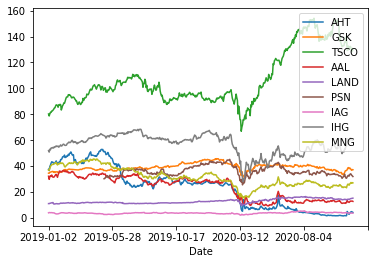

In [64]:
#Create a single object with Adjusted Close prices, plot them together in one time series plot
AdjClose_df = df.loc[idx[:,'Adj.Close',:]]
AdjClose_df = AdjClose_df.reset_index().set_index('Date')
AdjClose_df.drop('level_1', axis = 1, inplace = True)
AdjClose_df.plot()